In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r"C:\Users\ashib\OneDrive\Desktop\archive\wine.data",header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']

In [11]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

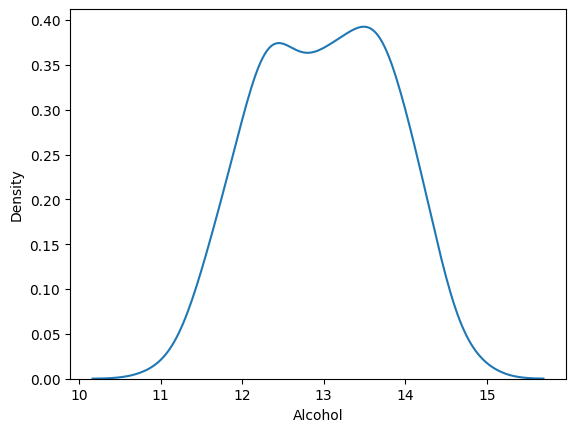

In [12]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

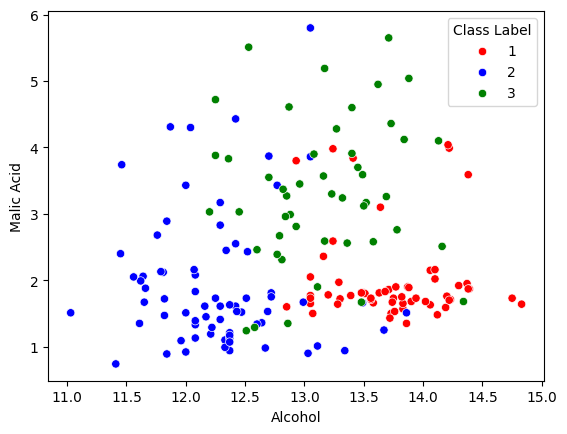

In [20]:

color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(
    x=df['Alcohol'], 
    y=df['Malic Acid'], 
    hue=df['Class Label'], 
    palette=color_dict
)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class Label',axis=1),
                                               df['Class Label'],
                                               test_size=0.3,
9                                               random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [27]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [28]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


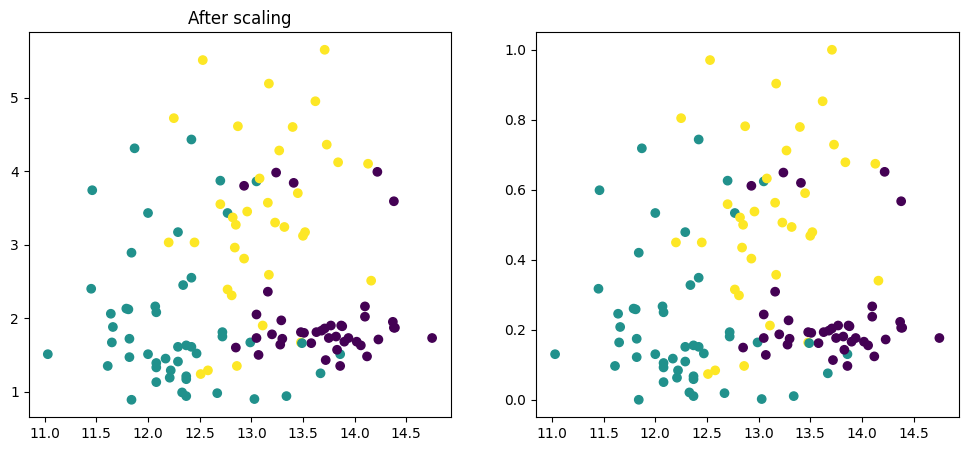

In [30]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax1.set_title("Before scaling")
ax2.scatter(X_train['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
ax1.set_title("After scaling")
plt.show()

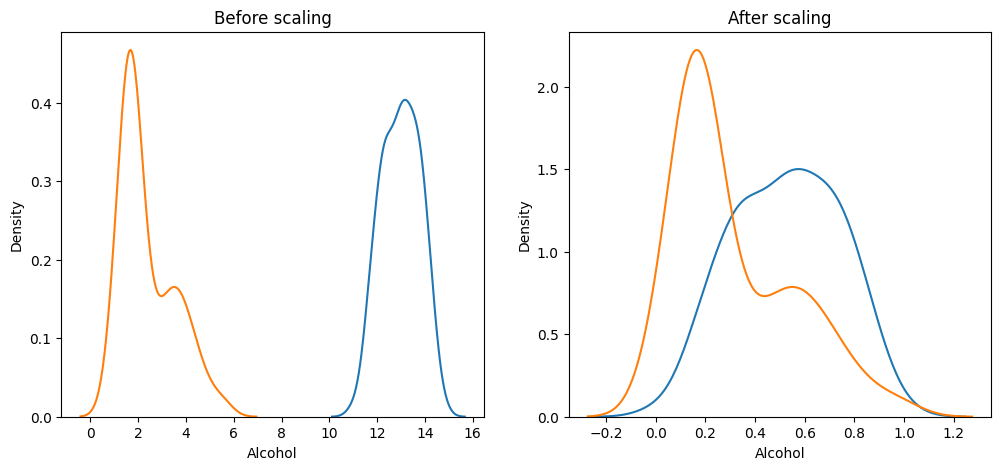

In [34]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)
plt.show()

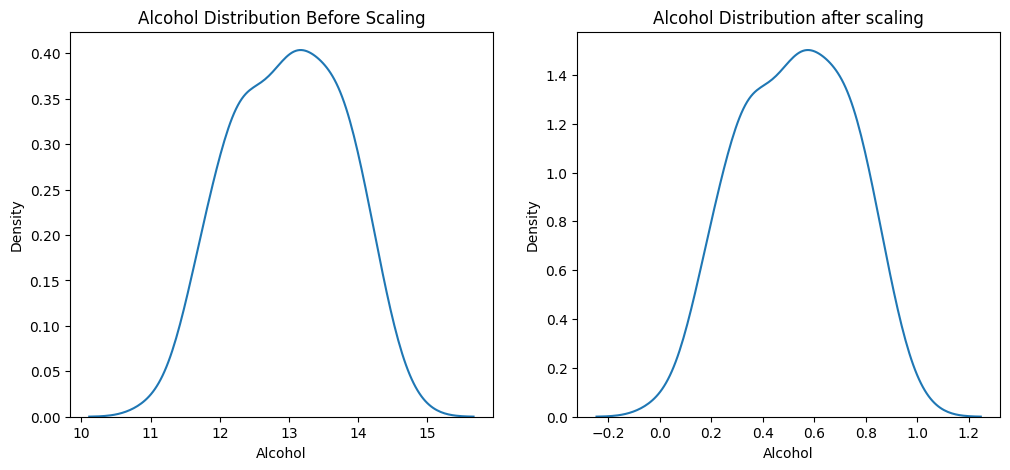

In [37]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("Alcohol Distribution after scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()

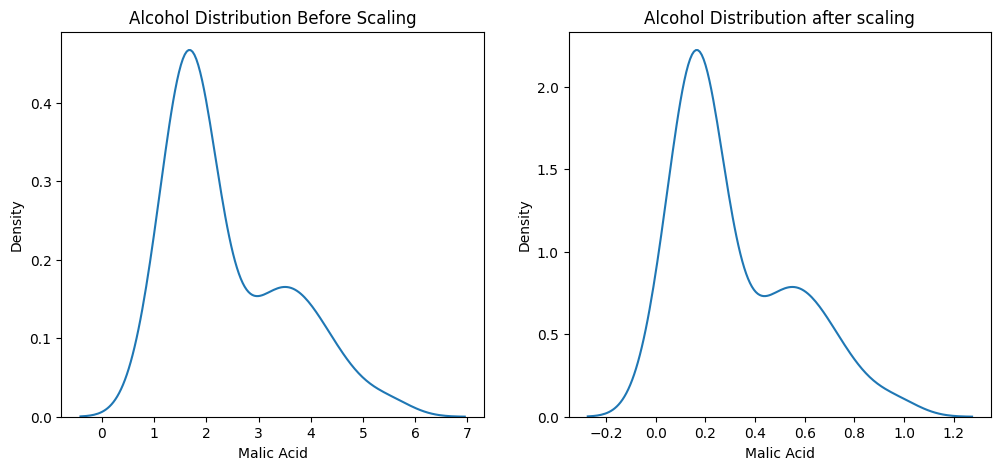

In [38]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

ax2.set_title("Alcohol Distribution after scaling")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)
plt.show()